In [1]:
import torch, torchvision
import torchvision.models as models

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
models.alexnet(pretrained=False)

/home/ubuntu/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Image load and normalize

![nn](data/alexnet_fig1.png)

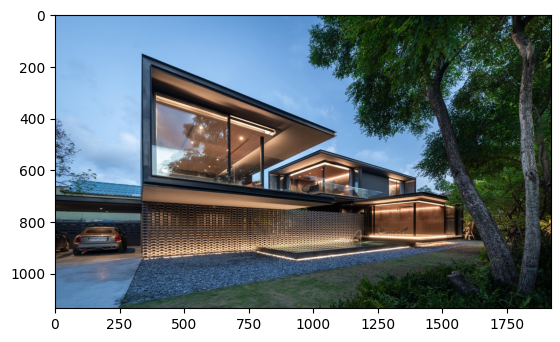

torch.Size([1, 3, 1135, 1920])


In [4]:
image = './data/house.jpg'
image = Image.open(image).convert('RGB')
plt.imshow(image)
plt.show()


## convert pytorch tensor and normalize image
to_tensor = torchvision.transforms.ToTensor()
normalizer = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

image = normalizer(to_tensor(image))

image = image.unsqueeze(0) ## batchify ## [B, C, H, W]

print(image.shape)


## Load pre-trained weights on ImageNet classification task

https://arxiv.org/abs/1404.5997


In [5]:
alexnet = models.alexnet(pretrained=True)

alexnet.eval() ## freeze weights.

alexnet.train() ## trainable weights.

alexnet.eval()

/home/ubuntu/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 112MB/s]  


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Forward

In [6]:

print("input shape: ", image.shape)

logit = alexnet(image)

print("output shape",logit.shape, logit)

print(torch.argmax(logit))

input shape:  torch.Size([1, 3, 1135, 1920])
output shape torch.Size([1, 1000]) tensor([[-4.2845e-01, -2.1002e+00, -5.4194e-01, -1.8714e+00, -2.2492e+00,
         -1.7736e+00, -1.1291e+00, -1.0509e+00, -5.9775e-01,  1.3302e+00,
         -8.1776e-01, -8.5641e-01,  3.1273e-01,  5.2491e-01, -8.5907e-02,
          4.0764e-01, -7.7016e-01,  6.4502e-02,  1.0842e+00,  8.5704e-01,
         -1.0651e+00, -2.9236e-01, -1.9757e-01,  6.6258e-01,  5.4950e-01,
         -1.6852e+00, -1.7508e+00, -1.6219e+00, -2.4442e+00, -8.8987e-01,
         -1.5445e+00, -2.0334e+00, -2.4957e+00, -2.6909e+00, -6.5930e-01,
         -1.9151e+00, -2.7491e-01, -1.7893e+00, -1.8676e+00, -8.7787e-01,
         -4.3461e-01, -1.6141e+00, -1.1089e+00, -6.9367e-01, -3.7153e-01,
         -1.3940e+00, -1.3295e-01, -1.7040e+00, -9.8107e-01, -6.8400e-01,
         -6.6942e-01, -6.8293e-01, -1.1262e+00, -1.4773e+00, -8.7292e-02,
         -9.2530e-01, -1.7469e+00, -1.3225e+00, -7.0683e-01, -5.5053e-01,
         -5.8563e-01, -1.2556e+0

## Load existing dataset

https://pytorch.org/vision/0.12/datasets.html

In [7]:
cifar10 = torchvision.datasets.CIFAR10(root='./', download=True)

100%|██████████| 170498071/170498071 [00:11<00:00, 14218100.07it/s]


Extracting ./cifar-10-python.tar.gz to ./


In [8]:
len(cifar10)

50000

(32, 32) 6


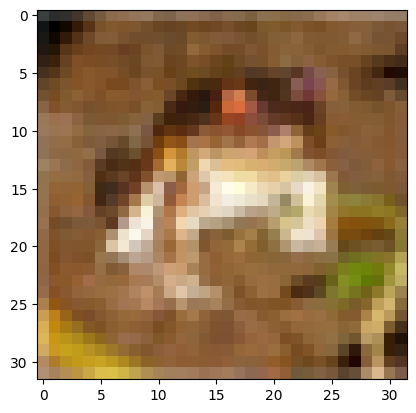

torch.Size([1, 3, 32, 32])


In [10]:

for img, gt in cifar10:

    print(img.size, gt)

    plt.imshow(img)
    plt.show()
    
    
    ### TODO: transforms the image to pytorch tensor and forward into the alexnet model.
    to_tensor = torchvision.transforms.ToTensor()
    normalizer = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    
    img = normalizer(to_tensor(img))
    img = img.unsqueeze(0)
    
    print(img.shape)
    

    
    break
    
    
    